# NYC's COVID-19 New Daily Counts

New cases, new hospitalizations, and new deaths over time

## 0. Import dependencies

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd

## 1. Read data

Data notes from the data source [https://github.com/nychealth/coronavirus-data]:

> This (`case-hosp-death.csv`) file includes daily counts of new confirmed cases, hospitalizations, and deaths:
> * Cases are by date of diagnosis
> * Hospitalizations are by date of admission
> * Deaths are by date of death
>
> Because of delays in reporting, the most recent data may be incomplete. Data shown currently will be updated in the future as new cases, hospitalizations, and deaths are reported.

In [2]:
update_str = 'as of Apr 14, 2020'

source_str = 'Sources: Data: nyc.gov/coronavirus - Chart: carlos-afonso.github.io/COVID-19'
#source_str = 'Data: NYC Health: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'
#source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

data_file = '../data/nyc-health-github/case-hosp-death.csv'

df = pd.read_csv(data_file)

df

,Retrieving data. Wait a few seconds and try to cut or copy again.,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/2/20,1,12.0,NaN
1,3/3/20,3,10.0,NaN
2,3/4/20,10,13.0,NaN
3,3/5/20,2,17.0,NaN
4,3/6/20,8,17.0,NaN
5,3/7/20,14,9.0,NaN
6,3/8/20,21,15.0,NaN
7,3/9/20,54,36.0,NaN
8,3/10/20,75,48.0,NaN
9,3/11/20,157,72.0,1.0


## 2. Clean data

### 2.1. Rename columns

Renames the columns with names that are easier to work with.

In [3]:
# Show orignal column names
df.columns

Index(['Retrieving data. Wait a few seconds and try to cut or copy again.',
       'NEW_COVID_CASE_COUNT', 'HOSPITALIZED_CASE_COUNT', 'DEATH_COUNT'],
      dtype='object')

In [4]:
# Define dictionary to rename columns
col_rename_dict = {
    'Retrieving data. Wait a few seconds and try to cut or copy again.': 'date',
    'DATE_OF_INTEREST'       : 'date',
    'NEW_COVID_CASE_COUNT'   : 'cases',
    'HOSPITALIZED_CASE_COUNT': 'hosps',
    'DEATH_COUNT'            : 'deaths'
}

# Rename columns
df.rename(columns=col_rename_dict, inplace=True)

# Show the last data rows
df.tail()

,date,cases,hosps,deaths
39,4/10/20,3307,680.0,328.0
40,4/11/20,1740,216.0,283.0
41,4/12/20,1053,112.0,241.0
42,4/13/20,797,10.0,156.0
43,4/14/20,26,NaN,43.0


### 2.2. Delete last row

Usually the latest data entry (the latest day, the last data row) is very incomplete and the counts are very low, which can be misleading.

Therefore, it's better to exclude that last data row from the visualizations.

In [5]:
#delete_last_row = False

# Drop the last data row
#if delete_last_row: df.drop([len(df) - 1], inplace=True)

# Show the last data rows
#df.tail()

### 2.3. Create date labels

In [6]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    
    # Formats: '%m/%d', '%m/%d/%y', "%#d\n%b", "%b %#d", "%#d\n%b\n%Y"
    
    first_label = dates[0].strftime("%#d\n%b")
    #first_label = dates[0].strftime('%#m/%#d')
    
    last_label = dates[len(dates)-1].strftime("%#d\n%b")
    #last_label = dates[len(dates)-1].strftime('%#m/%#d/%y')
    
    labels = [first_label]
    
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        #label = dates[i].strftime('%#m/%#d')
        if dates[i].month != dates[i-1].month:
            label = dates[i].strftime("%#d\n%b")
            #label = dates[i].strftime('%#m/%#d')
            correct_last_label = True
        labels.append(label)
    
    if correct_last_label:
        last_label = dates[len(dates)-1].strftime("%#d")
    
    labels.append(last_label)
    
    return labels


df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,cases,hosps,deaths,date_obj,date_label
0,3/2/20,1,12.0,NaN,2020-03-02,2\nMar
1,3/3/20,3,10.0,NaN,2020-03-03,3
2,3/4/20,10,13.0,NaN,2020-03-04,4
3,3/5/20,2,17.0,NaN,2020-03-05,5
4,3/6/20,8,17.0,NaN,2020-03-06,6
5,3/7/20,14,9.0,NaN,2020-03-07,7
6,3/8/20,21,15.0,NaN,2020-03-08,8
7,3/9/20,54,36.0,NaN,2020-03-09,9
8,3/10/20,75,48.0,NaN,2020-03-10,10
9,3/11/20,157,72.0,1.0,2020-03-11,11


In [7]:
# Create x-axis values and labels for plots

n = len(df)

x_values = list(range(n))

x_labels = [''] * n

# Create first label
x_labels[0] = df['date_obj'][0].strftime("%#d\n%b")
last_full_label = x_labels[0]
x_values_with_labels = [i for i in x_values if (i%7==0 or i==(n-1))]
# Create middle labels
for i in x_values_with_labels[1:]:
    date = df['date_obj'][i]
    x_labels[i] = date.strftime("%#d\n%b")
    if x_labels[i][-3:] == last_full_label[-3:]:
        x_labels[i] = date.strftime("%#d")
    last_full_label = date.strftime("%#d\n%b")

# temproary fix
x_labels[-1] = ''

print(x_values)
print(x_labels)
print(x_values_with_labels)
print([x_labels[i] for i in x_values_with_labels])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
['2\nMar', '', '', '', '', '', '', '9', '', '', '', '', '', '', '16', '', '', '', '', '', '', '23', '', '', '', '', '', '', '30', '', '', '', '', '', '', '6\nApr', '', '', '', '', '', '', '13', '']
[0, 7, 14, 21, 28, 35, 42, 43]
['2\nMar', '9', '16', '23', '30', '6\nApr', '13', '']


In [8]:
df[['cases', 'hosps', 'deaths']].max()

cases     6021.0
hosps     1638.0
deaths     487.0
dtype: float64

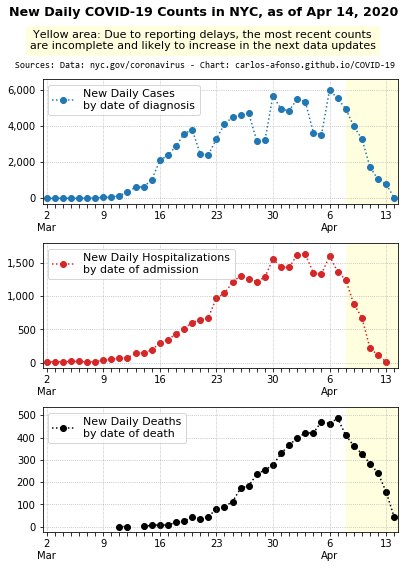

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6, 8), sharex=False)

ax1.plot(x_values, df['cases'], 'o:', color='C0', label='New Daily Cases\nby date of diagnosis')
ax2.plot(x_values, df['hosps'], 'o:', color='C3', label='New Daily Hospitalizations\nby date of admission')
ax3.plot(x_values, df['deaths'], 'o:', color='k', label='New Daily Deaths\nby date of death')

y1max = df['cases'].max()
y2max = df['hosps'].max()
y3max = df['deaths'].max()
a = -0.05
b = 1.1
ax1.set_ylim(a*y1max, b*y1max)
ax2.set_ylim(a*y2max, b*y2max)
ax3.set_ylim(a*y3max, b*y3max)

title_str = 'New Daily COVID-19 Counts in NYC, ' + update_str
fig.suptitle(title_str, fontsize=12.7, fontweight='bold', ha='center', x=0.48) #x=0.5

warning_color = 'lightyellow'
subtitle_str = 'Yellow area: Due to reporting delays, the most recent counts\n' + \
               'are incomplete and likely to increase in the next data updates'
ax1.set_title(subtitle_str, backgroundcolor=warning_color, fontsize=11, pad=30, x=0.45)

ax1.text(-3.9, 1.2*y1max, source_str, fontfamily='Consolas', fontsize=9)

ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for ax in (ax1, ax2, ax3):
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle=':')
    ax.legend(loc='upper left', fontsize=11)
    ax.axvspan(len(df)-7, len(df), facecolor=warning_color)
    ax.set_xlim(-0.5, len(df)-0.5)
    for x in x_values_with_labels[:-1]:
        ax.axvline(x, linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-new-daily-counts'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

In [11]:
df.sum()

date          3/2/203/3/203/4/203/5/203/6/203/7/203/8/203/9/...
cases                                                    111421
hosps                                                     29169
deaths                                                     6789
date_label    2\nMar3456789101112131415161718192021222324252...
dtype: object

Total counts (from https://www1.nyc.gov/site/doh/covid/covid-19-data.page):

* Cases: 111,424
* Total hospitalized: 29,741
* Deaths: 10,899
    * Confirmed: 6,840
    * Probable: 4,059
* As of: April 14, 6 p.m.